# Transfer learning
---
Inormation about accessible prtrained models for pytorch can be found at ***https://pytorch.org/docs/stable/torchvision/models.html***

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from torchvision import models
import numpy as np

In [19]:
resnet18 = models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [20]:
conv1 = resnet18.layer4[0].conv1
conv1

Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

More insights to models can be found here https://github.com/pytorch/vision/tree/master/torchvision/models

In [21]:
models.resnet.model_urls

{'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
 'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
 'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
 'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
 'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth'}

In [22]:
import os
os.environ["TORCH_HOME"] = "./"

In [23]:
resnet18 = models.resnet18(pretrained=True)
resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [24]:
from image_processing_workshop.utils import get_image_from_url
from image_processing_workshop.visual import plot_image
from torchvision import datasets, transforms
import numpy as np
import torch

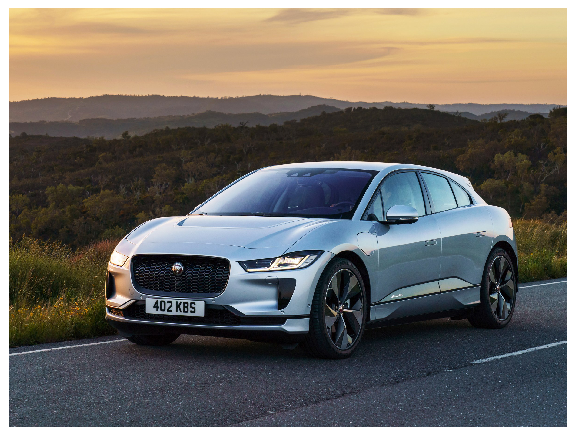

In [25]:
url = 'https://media.wired.com/photos/5b86fce8900cb57bbfd1e7ee/master/pass/Jaguar_I-PACE_S_Indus-Silver_065.jpg'
img = get_image_from_url(url, to_grayscale=False)
plot_image(img)

In [26]:
transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [27]:
img.shape

(1800, 2400, 3)

In [29]:
transformed_img = transformation(img)

In [30]:
transformed_img.shape

torch.Size([3, 224, 298])

In [33]:
resnet18.eval()
resnet18(transformed_img.unsqueeze(0))

tensor([[-1.0964e+00, -2.3460e+00, -1.1277e-01, -1.9760e+00, -1.0110e+00,
         -1.7371e+00, -1.0038e+00, -4.0546e-01, -7.1522e-01,  5.7015e-01,
         -1.7620e+00, -1.2362e+00, -7.8287e-01, -2.6167e+00, -2.8569e+00,
         -1.2883e+00, -1.3941e+00,  4.7096e-01, -2.9589e-01, -1.0486e+00,
         -1.9077e+00,  1.4342e+00, -5.7105e-01,  1.1600e+00,  8.3457e-01,
         -2.9066e+00, -3.0855e+00, -2.7464e+00, -1.6189e+00, -3.3898e+00,
         -1.6479e+00, -1.2566e+00, -1.7400e+00,  1.0640e+00,  3.2965e+00,
         -1.2107e-01, -4.3115e-01, -2.2821e-01, -3.2343e-01, -1.4100e+00,
         -1.0098e-01, -9.5167e-01, -6.1329e-01, -1.5150e+00, -1.4914e+00,
          2.0187e-02, -1.3097e+00, -1.4781e+00, -9.6357e-01,  8.3721e-02,
         -1.4812e-01,  3.0606e-02,  1.5003e-01, -4.3351e-01,  4.9059e-01,
         -1.3573e+00,  3.7608e-01, -1.2696e+00, -5.7625e-01,  4.7882e-01,
          6.3219e-01, -4.0998e-01,  1.0578e-01, -1.2761e+00, -1.8228e+00,
         -8.1739e-01, -1.0209e+00, -4.

In [57]:
resnet18.fc = torch.nn.Sequential(
    resnet18.fc, 
    torch.nn.Softmax(dim=1))

In [58]:
from image_processing_workshop.utils import get_imagenet_category_names
from image_processing_workshop.visual import plot_classify

In [59]:
get_imagenet_category_names(use_cache=True)[:10]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


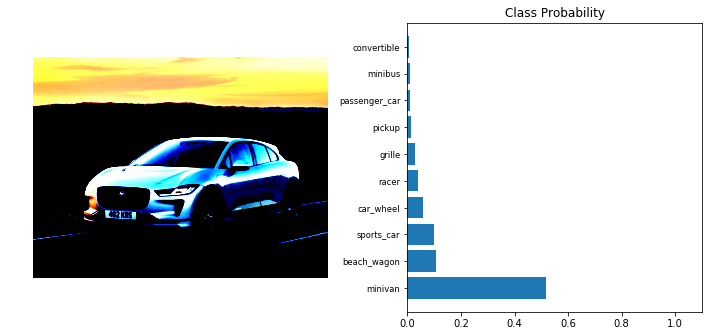

In [61]:
plot_classify(transformed_img, resnet18, category_names=get_imagenet_category_names())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


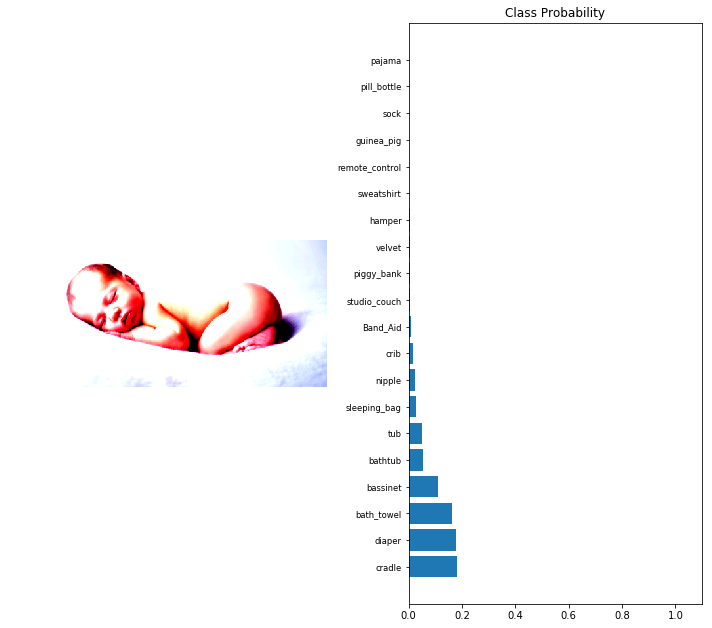

In [63]:
url = 'https://media2.s-nbcnews.com/i/newscms/2019_03/1402031/baby-name-today-main-190115_92c502d95f67cf1f7edc6851782a74c8.jpg'
img = get_image_from_url(url, to_grayscale=False)
transformed_img = transformation(img)
plot_classify(transformed_img, resnet18, topn=20, category_names=get_imagenet_category_names())

```javascript

javascript:document.body.innerHTML = `<a href="data:text/csv;charset=utf-8,${escape(Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou).join('\n'))}" download="urls.txt">download urls</a>`;
```

In [134]:
from PIL import Image

def image_ok(file):
    try:
        v_image = Image.open(file)
        v_image.verify()
        np_image = np.array(v_image)
        if len(np_image.shape) != 3:
            return False
        if np_image.shape[2]!=3:
            return False
        return True;
    except OSError:
        return False;

In [135]:
import urllib.request
import tqdm 

def scrape_url_list(url_list, category_name):
    successed = 0
    failed  = 0

    root_folder = './dataset'
    train_valid_id = 0
    train_valid = ['train', 'valid']

    os.makedirs(os.path.join(root_folder, train_valid[0], category_name), exist_ok=True)
    os.makedirs(os.path.join(root_folder, train_valid[1], category_name), exist_ok=True)

    for url in tqdm.tqdm(open(url_list, 'r').readlines()):
        url = url.strip()
        file_name = url.split('/')[-1].split('.', 2)[0]+'.jpg'

        try:
            path = os.path.join(root_folder, train_valid[train_valid_id], category_name, file_name)
            urllib.request.urlretrieve(url, path)
            if not image_ok(path):
                os.remove(path)
                raise OSError()
        except Exception as err:
            print(err)
            failed += 1
        else:
            successed += 1
            train_valid_id = (train_valid_id + 1) % 2
    return successed, failed
    

    

In [129]:
v_image = Image.open('/home/adam/code/image_processing_workshop/notebooks/pytorch_version/dataset/train/dogs/3.jpg')

In [136]:
successed, failed = scrape_url_list('dogs_url.txt', 'dogs')




  0%|          | 0/200 [00:00<?, ?it/s]


  0%|          | 1/200 [00:00<00:43,  4.61it/s]




  1%|          | 2/200 [00:02<02:46,  1.19it/s]




  2%|▏         | 3/200 [00:02<02:08,  1.53it/s]




  2%|▏         | 4/200 [00:03<02:26,  1.34it/s]




  2%|▎         | 5/200 [00:17<14:49,  4.56s/it]




  3%|▎         | 6/200 [00:17<10:39,  3.30s/it]




  4%|▎         | 7/200 [00:18<08:26,  2.62s/it]




  4%|▍         | 8/200 [00:21<08:41,  2.71s/it]




  4%|▍         | 9/200 [00:21<06:15,  1.97s/it]




  5%|▌         | 10/200 [00:22<04:41,  1.48s/it]




  6%|▌         | 11/200 [00:22<03:36,  1.14s/it]




  6%|▌         | 12/200 [00:22<02:50,  1.11it/s]




  6%|▋         | 13/200 [00:22<02:10,  1.44it/s]




  7%|▋         | 14/200 [00:23<01:50,  1.69it/s]




  8%|▊         | 15/200 [00:23<01:51,  1.66it/s]




  8%|▊         | 16/200 [00:24<01:55,  1.59it/s]




  8%|▊         | 17/200 [00:26<03:10,  1.04s/it]




  9%|▉         | 18/200 [00:26<02:28,  1.22it/s]




 10%|▉         | 19/200 [00:27<01:57,  1.55it/s]




 10%|█         | 20/200 [00:27<01:46,  1.69it/s]




 10%|█         | 21/200 [00:27<01:31,  1.95it/s]




 11%|█         | 22/200 [00:28<01:36,  1.84it/s]




 12%|█▏        | 23/200 [00:28<01:20,  2.19it/s]




 12%|█▏        | 24/200 [00:31<03:04,  1.05s/it]




 12%|█▎        | 25/200 [00:31<02:24,  1.21it/s]




 13%|█▎        | 26/200 [00:31<01:57,  1.48it/s]




 14%|█▎        | 27/200 [00:32<01:55,  1.50it/s]




 14%|█▍        | 28/200 [00:33<01:57,  1.47it/s]


 14%|█▍        | 29/200 [00:33<01:30,  1.89it/s]


HTTP Error 403: Forbidden





 15%|█▌        | 30/200 [00:38<05:30,  1.94s/it]




 16%|█▌        | 31/200 [00:39<04:12,  1.49s/it]




 16%|█▌        | 32/200 [00:39<03:30,  1.25s/it]




 16%|█▋        | 33/200 [00:45<07:01,  2.52s/it]




 17%|█▋        | 34/200 [00:45<05:08,  1.86s/it]




 18%|█▊        | 35/200 [00:46<03:55,  1.43s/it]




 18%|█▊        | 36/200 [00:46<02:56,  1.08s/it]




 18%|█▊        | 37/200 [00:46<02:21,  1.16it/s]




 19%|█▉        | 38/200 [00:51<05:23,  2.00s/it]




 20%|█▉        | 39/200 [00:51<04:14,  1.58s/it]


 20%|██        | 40/200 [00:52<03:03,  1.15s/it]


HTTP Error 403: Forbidden





 20%|██        | 41/200 [00:52<02:24,  1.10it/s]




 21%|██        | 42/200 [00:52<01:59,  1.32it/s]




 22%|██▏       | 43/200 [00:53<01:45,  1.49it/s]




 22%|██▏       | 44/200 [00:53<01:23,  1.86it/s]




 22%|██▎       | 45/200 [00:53<01:15,  2.07it/s]


 23%|██▎       | 46/200 [00:54<00:59,  2.59it/s]




 24%|██▎       | 47/200 [00:54<00:54,  2.81it/s]




 24%|██▍       | 48/200 [00:55<01:51,  1.36it/s]




 24%|██▍       | 49/200 [00:56<01:27,  1.73it/s]

HTTP Error 403: Forbidden





 25%|██▌       | 50/200 [00:56<01:18,  1.91it/s]




 26%|██▌       | 51/200 [01:00<04:01,  1.62s/it]




 26%|██▌       | 52/200 [01:01<03:15,  1.32s/it]




 26%|██▋       | 53/200 [01:01<02:25,  1.01it/s]




 27%|██▋       | 54/200 [01:01<01:55,  1.26it/s]




 28%|██▊       | 55/200 [01:02<01:47,  1.35it/s]




 28%|██▊       | 56/200 [01:02<01:28,  1.62it/s]




 28%|██▊       | 57/200 [01:03<01:45,  1.35it/s]




 29%|██▉       | 58/200 [01:04<01:36,  1.48it/s]


 30%|██▉       | 59/200 [01:04<01:14,  1.90it/s]




 30%|███       | 60/200 [01:04<01:09,  2.01it/s]


 30%|███       | 61/200 [01:05<00:56,  2.47it/s]




 31%|███       | 62/200 [01:05<00:51,  2.69it/s]




 32%|███▏      | 63/200 [01:06<01:27,  1.56it/s]




 32%|███▏      | 64/200 [01:07<01:14,  1.83it/s]




 32%|███▎      | 65/200 [01:07<01:09,  1.94it/s]

HTTP Error 403: Forbidden





 33%|███▎      | 66/200 [01:08<01:24,  1.59it/s]

HTTP Error 403: Forbidden





 34%|███▎      | 67/200 [01:08<01:13,  1.82it/s]




 34%|███▍      | 68/200 [01:09<01:06,  1.98it/s]




 34%|███▍      | 69/200 [01:09<01:15,  1.73it/s]




 35%|███▌      | 70/200 [01:10<01:13,  1.77it/s]




 36%|███▌      | 71/200 [01:10<01:00,  2.12it/s]




 36%|███▌      | 72/200 [01:11<01:02,  2.06it/s]




 36%|███▋      | 73/200 [01:12<01:28,  1.44it/s]




 37%|███▋      | 74/200 [01:12<01:16,  1.64it/s]




 38%|███▊      | 75/200 [01:14<01:51,  1.12it/s]




 38%|███▊      | 76/200 [01:15<01:54,  1.08it/s]




 38%|███▊      | 77/200 [01:16<01:49,  1.13it/s]




 39%|███▉      | 78/200 [01:18<02:45,  1.36s/it]




 40%|███▉      | 79/200 [01:21<03:29,  1.73s/it]




 40%|████      | 80/200 [01:21<02:40,  1.34s/it]




 40%|████      | 81/200 [01:21<02:02,  1.03s/it]




 41%|████      | 82/200 [01:22<01:32,  1.28it/s]

HTTP Error 403: Forbidden





 42%|████▏     | 83/200 [01:22<01:15,  1.55it/s]


 42%|████▏     | 84/200 [01:22<00:58,  1.98it/s]


HTTP Error 403: Forbidden





 42%|████▎     | 85/200 [01:26<02:41,  1.40s/it]




 43%|████▎     | 86/200 [01:26<02:17,  1.20s/it]




 44%|████▎     | 87/200 [01:27<01:43,  1.09it/s]


 44%|████▍     | 88/200 [01:27<01:18,  1.42it/s]


HTTP Error 403: Forbidden





 44%|████▍     | 89/200 [01:27<01:04,  1.72it/s]




 45%|████▌     | 90/200 [01:27<00:54,  2.03it/s]




 46%|████▌     | 91/200 [01:28<00:46,  2.33it/s]


 46%|████▌     | 92/200 [01:28<00:38,  2.81it/s]




 46%|████▋     | 93/200 [01:28<00:32,  3.29it/s]


 47%|████▋     | 94/200 [01:28<00:28,  3.70it/s]




 48%|████▊     | 95/200 [01:31<01:37,  1.08it/s]




 48%|████▊     | 96/200 [01:31<01:14,  1.40it/s]


 48%|████▊     | 97/200 [01:31<00:56,  1.81it/s]


HTTP Error 403: Forbidden





 49%|████▉     | 98/200 [01:32<00:55,  1.84it/s]




 50%|████▉     | 99/200 [01:32<00:46,  2.16it/s]




 50%|█████     | 100/200 [01:32<00:42,  2.36it/s]


 50%|█████     | 101/200 [01:32<00:34,  2.87it/s]




 51%|█████     | 102/200 [01:33<00:28,  3.39it/s]


 52%|█████▏    | 103/200 [01:33<00:23,  4.09it/s]




 52%|█████▏    | 104/200 [01:33<00:22,  4.31it/s]




 52%|█████▎    | 105/200 [01:33<00:26,  3.64it/s]


 53%|█████▎    | 106/200 [01:33<00:23,  4.00it/s]


HTTP Error 403: Forbidden





 54%|█████▎    | 107/200 [01:34<00:38,  2.40it/s]




 54%|█████▍    | 108/200 [01:44<04:45,  3.11s/it]




 55%|█████▍    | 109/200 [01:44<03:23,  2.24s/it]




 55%|█████▌    | 110/200 [01:44<02:26,  1.63s/it]




 56%|█████▌    | 111/200 [01:45<02:02,  1.38s/it]




 56%|█████▌    | 112/200 [01:45<01:32,  1.05s/it]




 56%|█████▋    | 113/200 [01:46<01:21,  1.06it/s]




 57%|█████▋    | 114/200 [01:49<02:16,  1.58s/it]




 57%|█████▊    | 115/200 [01:50<02:08,  1.51s/it]


 58%|█████▊    | 116/200 [01:51<01:33,  1.12s/it]




 58%|█████▊    | 117/200 [01:51<01:09,  1.19it/s]




 59%|█████▉    | 118/200 [01:51<00:56,  1.45it/s]




 60%|█████▉    | 119/200 [01:51<00:45,  1.77it/s]


 60%|██████    | 120/200 [01:51<00:35,  2.22it/s]




 60%|██████    | 121/200 [01:54<01:21,  1.03s/it]




 61%|██████    | 122/200 [01:56<01:55,  1.49s/it]




 62%|██████▏   | 123/200 [01:57<01:38,  1.28s/it]




 62%|██████▏   | 124/200 [01:59<01:42,  1.35s/it]


 62%|██████▎   | 125/200 [01:59<01:13,  1.03it/s]


HTTP Error 403: Forbidden





 63%|██████▎   | 126/200 [01:59<01:00,  1.22it/s]




 64%|██████▎   | 127/200 [02:00<00:48,  1.50it/s]




 64%|██████▍   | 128/200 [02:00<00:44,  1.61it/s]




 64%|██████▍   | 129/200 [02:00<00:37,  1.88it/s]




 65%|██████▌   | 130/200 [02:02<00:49,  1.41it/s]




 66%|██████▌   | 131/200 [02:02<00:38,  1.77it/s]


 66%|██████▌   | 132/200 [02:02<00:30,  2.24it/s]




 66%|██████▋   | 133/200 [02:02<00:30,  2.23it/s]


 67%|██████▋   | 134/200 [02:03<00:23,  2.78it/s]


HTTP Error 403: Forbidden





 68%|██████▊   | 135/200 [02:03<00:20,  3.16it/s]




 68%|██████▊   | 136/200 [02:04<00:45,  1.41it/s]


 68%|██████▊   | 137/200 [02:05<00:34,  1.85it/s]

HTTP Error 403: Forbidden
HTTP Error 403: Forbidden





 69%|██████▉   | 138/200 [02:05<00:29,  2.13it/s]




 70%|██████▉   | 139/200 [02:05<00:26,  2.32it/s]




 70%|███████   | 140/200 [02:05<00:22,  2.68it/s]




 70%|███████   | 141/200 [02:06<00:19,  3.06it/s]




 71%|███████   | 142/200 [02:06<00:18,  3.19it/s]




 72%|███████▏  | 143/200 [02:06<00:16,  3.51it/s]




 72%|███████▏  | 144/200 [02:07<00:17,  3.16it/s]


 72%|███████▎  | 145/200 [02:07<00:15,  3.62it/s]




 73%|███████▎  | 146/200 [02:09<00:54,  1.02s/it]




 74%|███████▎  | 147/200 [02:10<00:41,  1.27it/s]




 74%|███████▍  | 148/200 [02:11<00:43,  1.21it/s]




 74%|███████▍  | 149/200 [02:11<00:35,  1.45it/s]




 75%|███████▌  | 150/200 [02:12<00:35,  1.40it/s]




 76%|███████▌  | 151/200 [02:12<00:28,  1.70it/s]




 76%|███████▌  | 152/200 [02:12<00:25,  1.91it/s]




 76%|███████▋  | 153/200 [02:13<00:20,  2.30it/s]




 77%|███████▋  | 154/200 [02:13<00:18,  2.45it/s]

HTTP Error 403: Forbidden





 78%|███████▊  | 155/200 [02:15<00:34,  1.29it/s]




 78%|███████▊  | 156/200 [02:16<00:40,  1.10it/s]




 78%|███████▊  | 157/200 [02:17<00:47,  1.11s/it]




 79%|███████▉  | 158/200 [02:18<00:37,  1.13it/s]




 80%|███████▉  | 159/200 [02:18<00:28,  1.46it/s]




 80%|████████  | 160/200 [02:18<00:22,  1.81it/s]




 80%|████████  | 161/200 [02:19<00:18,  2.16it/s]




 81%|████████  | 162/200 [02:19<00:16,  2.28it/s]




 82%|████████▏ | 163/200 [02:19<00:14,  2.64it/s]


 82%|████████▏ | 164/200 [02:19<00:11,  3.10it/s]




 82%|████████▎ | 165/200 [02:20<00:11,  2.94it/s]




 83%|████████▎ | 166/200 [02:20<00:11,  2.91it/s]




 84%|████████▎ | 167/200 [02:21<00:14,  2.22it/s]




 84%|████████▍ | 168/200 [02:21<00:12,  2.66it/s]




 84%|████████▍ | 169/200 [02:25<00:43,  1.41s/it]


 85%|████████▌ | 170/200 [02:25<00:31,  1.04s/it]


HTTP Error 403: Forbidden





 86%|████████▌ | 171/200 [02:27<00:42,  1.47s/it]


 86%|████████▌ | 172/200 [02:28<00:29,  1.06s/it]


HTTP Error 403: Forbidden





 86%|████████▋ | 173/200 [02:30<00:38,  1.42s/it]




 87%|████████▋ | 174/200 [02:30<00:28,  1.08s/it]




 88%|████████▊ | 175/200 [02:31<00:22,  1.11it/s]




 88%|████████▊ | 176/200 [02:31<00:19,  1.25it/s]




 88%|████████▊ | 177/200 [02:34<00:29,  1.28s/it]




 89%|████████▉ | 178/200 [02:34<00:22,  1.00s/it]




 90%|████████▉ | 179/200 [02:35<00:19,  1.06it/s]

HTTP Error 403: Forbidden





 90%|█████████ | 180/200 [02:35<00:15,  1.31it/s]




 90%|█████████ | 181/200 [02:35<00:11,  1.60it/s]




 91%|█████████ | 182/200 [02:36<00:10,  1.74it/s]




 92%|█████████▏| 183/200 [02:46<00:58,  3.44s/it]


 92%|█████████▏| 184/200 [02:46<00:39,  2.45s/it]


HTTP Error 403: Forbidden





 92%|█████████▎| 185/200 [02:46<00:26,  1.78s/it]




 93%|█████████▎| 186/200 [02:47<00:19,  1.37s/it]


 94%|█████████▎| 187/200 [02:47<00:13,  1.01s/it]




 94%|█████████▍| 188/200 [02:47<00:10,  1.18it/s]




 94%|█████████▍| 189/200 [02:49<00:10,  1.06it/s]




 95%|█████████▌| 190/200 [02:50<00:09,  1.05it/s]




 96%|█████████▌| 191/200 [02:50<00:06,  1.30it/s]




 96%|█████████▌| 192/200 [02:50<00:05,  1.43it/s]




 96%|█████████▋| 193/200 [02:52<00:06,  1.16it/s]

HTTP Error 403: Forbidden





 97%|█████████▋| 194/200 [02:52<00:04,  1.33it/s]




 98%|█████████▊| 195/200 [02:53<00:03,  1.29it/s]




 98%|█████████▊| 196/200 [02:53<00:02,  1.64it/s]

HTTP Error 403: Forbidden





 98%|█████████▊| 197/200 [02:54<00:01,  1.52it/s]




 99%|█████████▉| 198/200 [02:55<00:01,  1.12it/s]


100%|█████████▉| 199/200 [02:56<00:00,  1.46it/s]


HTTP Error 403: Forbidden





100%|██████████| 200/200 [02:56<00:00,  1.33it/s]

In [137]:
successed, failed

(0, 200)

In [96]:
from torchvision import datasets, transforms

In [98]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [101]:
root_folder = './dataset'
image_dataset = {x: datasets.ImageFolder(os.path.join(root_folder, x), data_transforms[x])
                 for x in ['train', 'valid']}
dataloader = {x: torch.utils.data.DataLoader(image_dataset[x], batch_size=32, shuffle=True, num_workers=4)
              for x in ['train', 'valid']}

dataset_sizes = {x: len(image_dataset[x]) for x in ['train', 'valid']}
class_names = image_dataset['train'].classes



In [102]:
dataset_sizes

{'train': 131, 'valid': 131}

In [103]:
class_names

['dogs', 'rats']

In [104]:
from image_processing_workshop.visual import plot_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


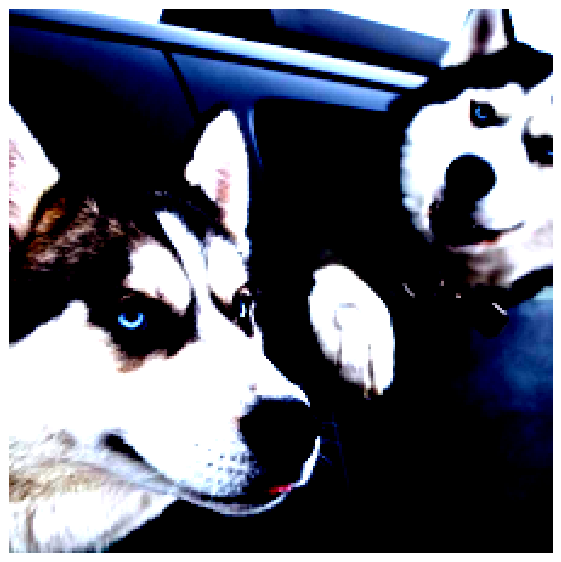

In [115]:
plot_image(image_dataset['valid'][19][0])

In [127]:
t = transforms.Compose([transforms.ToTensor()])
ds = datasets.ImageFolder(os.path.join(root_folder, 'valid'), t)
dl = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True, num_workers=4)

In [128]:
images, labels = next(iter(dl))

/home/adam/.pyenv/versions/3.6.3.workshop/lib/python3.6/site-packages/PIL/Image.py:966: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


RuntimeError: Traceback (most recent call last):
  File "/home/adam/.pyenv/versions/3.6.3.workshop/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/adam/.pyenv/versions/3.6.3.workshop/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 232, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/adam/.pyenv/versions/3.6.3.workshop/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 232, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/adam/.pyenv/versions/3.6.3.workshop/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 209, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 750 and 675 in dimension 2 at /pytorch/aten/src/TH/generic/THTensorMoreMath.cpp:1307


In [ ]:
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])